<a href="https://colab.research.google.com/github/jiyeonbeackuq/data-tutoring-sparta5/blob/main/machine_learning_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨, Îç∞Ïù¥ÌÑ∞  Î∂àÎü¨Ïò§Í∏∞

In [ ]:
# Ï£ºÌîºÌÑ∞ ÎÖ∏Ìä∏Î∂ÅÏúºÎ°ú Ïã§Ìñâ Ïãú/ ÏΩîÎû©ÏóêÏÑú Îç∞Ïù¥ÌÑ∞ ÎßàÏö¥Ìä∏Ìï¥ÏÑú ÏÇ¨Ïö©Ìï† Ìï¥Îãπ ÏΩîÎìú ÏÇ≠Ï†ú

# ‚ñ∂ Warnings Ï†úÍ±∞
import warnings
warnings.filterwarnings('ignore')

# ‚ñ∂ Google drive mount or Ìè¥Îçî ÌÅ¥Î¶≠ ÌõÑ Íµ¨Í∏ÄÎìúÎùºÏù¥Î∏å Ïó∞Í≤∞
from google.colab import drive
drive.mount('/content/drive')

# ‚ñ∂ Í≤ΩÎ°ú ÏÑ§Ï†ï (‚ÄªÍ∞ïÏùòÏûêÎ£åÍ∞Ä ÏúÑÏπòÏóê ÏûàÎäî Í≤ΩÎ°ú ÌôïÏù∏)
import os
os.chdir('/content/drive/MyDrive/data/')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/data'

In [ ]:
#!pip install xgboost
#!pip3 install xgboost

In [ ]:
!pip install scikit-learn==1.5.0
# !pip3 install scikit-learn==1.5.0

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.3/13.3 MB 25.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
!pip show xgboost scikit-learn
#!pip3 show xgboost scikit-learn

Name: xgboost
Version: 2.1.3
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, nvidia-nccl-cu12, scipy
Required-by: 
---
Name: scikit-learn
Version: 1.5.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.11/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, sentence-transformers, shap, sklearn-compat, sklearn-pandas, yellowbrick


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor, plot_tree, plot_importance

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import plot_tree

import joblib

In [ ]:
# MAPE Í≥ÑÏÇ∞ Ìï®Ïàò Ï†ïÏùò
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è DataFrame ÏÉùÏÑ±
df = pd.read_csv('Boston-house-price-data.csv')
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Ïª¨Îüº Ïù¥Î¶Ñ	ÏÑ§Î™Ö	Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ
- CRIM	1Ïù∏Îãπ Î≤îÏ£ÑÏú®	float
- ZN	25,000ÌèâÎ∞©ÌîºÌä∏ Ïù¥ÏÉÅÏùò Í±∞Ï£º Íµ¨Ïó≠ ÎπÑÏú®	float
- INDUS	ÎπÑÏÜåÎß§ ÏÉÅÏóÖ ÏßÄÏó≠ ÎπÑÏú®	float
- CHAS	Ï∞∞Ïä§Í∞ï Ïù∏Ï†ë Ïó¨Î∂Ä (1: Ïù∏Ï†ë, 0: ÎπÑÏù∏Ï†ë)	int
- NOX	ÏßàÏÜå ÏÇ∞ÌôîÎ¨º ÎÜçÎèÑ (10ppm Îã®ÏúÑ)	float
- RM	Ï£ºÌÉù 1Í∞ÄÍµ¨Îãπ ÌèâÍ∑† Î∞© Í∞úÏàò	float
- AGE	1940ÎÖÑ Ïù¥Ï†ÑÏóê Í±¥Ï∂ïÎêú ÏûêÍ∞Ä Ï£ºÌÉù ÎπÑÏú®	float
- DIS	5Í∞ú Ï£ºÏöî Î≥¥Ïä§ÌÑ¥ Í≥†Ïö© ÏÑºÌÑ∞ÍπåÏßÄÏùò Í∞ÄÏ§ë Í±∞Î¶¨	float
- RAD	Î∞©ÏÇ¨Ìòï Í≥†ÏÜçÎèÑÎ°ú Ï†ëÍ∑ºÏÑ± ÏßÄÏàò	int
- TAX	10,000Îã¨Îü¨Îãπ Ïû¨ÏÇ∞ÏÑ∏Ïú®	float
- PTRATIO	ÎßàÏùÑÎ≥Ñ ÌïôÏÉù-ÍµêÏÇ¨ ÎπÑÏú®	float
- B	1,000(Bk - 0.63)^2 (Bk: ÎßàÏùÑÎ≥Ñ ÌùëÏù∏ Ïù∏Íµ¨ ÎπÑÏú®)	float
- LSTAT	Ï†ÄÏÜåÎìùÏ∏µ Ïù∏Íµ¨ ÎπÑÏú® (%)	float
- MEDV	Ï£ºÌÉù Í∞ÄÍ≤© Ï§ëÏïôÍ∞í (Îã®ÏúÑ: 1,000Îã¨Îü¨) (Ï¢ÖÏÜç Î≥ÄÏàò - ÌÉÄÍ≤ü Í∞í)	float

„Ñ¥ MEDV Îã®ÏúÑÍ∞Ä 10,000Îã¨Îü¨ ÏïÑÎãàÏïº?

# 2) EDA Î∞è Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî

In [ ]:

# -------------------------------
# 1. EDA Î∞è Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
# -------------------------------
print("Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï†ïÎ≥¥:")
print(df.info())
print("\nÎç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌÜµÍ≥Ñ ÏöîÏïΩ:")
print(df.describe())
print("\nÍ≤∞Ï∏°Í∞í ÌôïÏù∏")
print(df.isna().sum())

Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None

Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌÜµÍ≥Ñ ÏöîÏïΩ:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean  

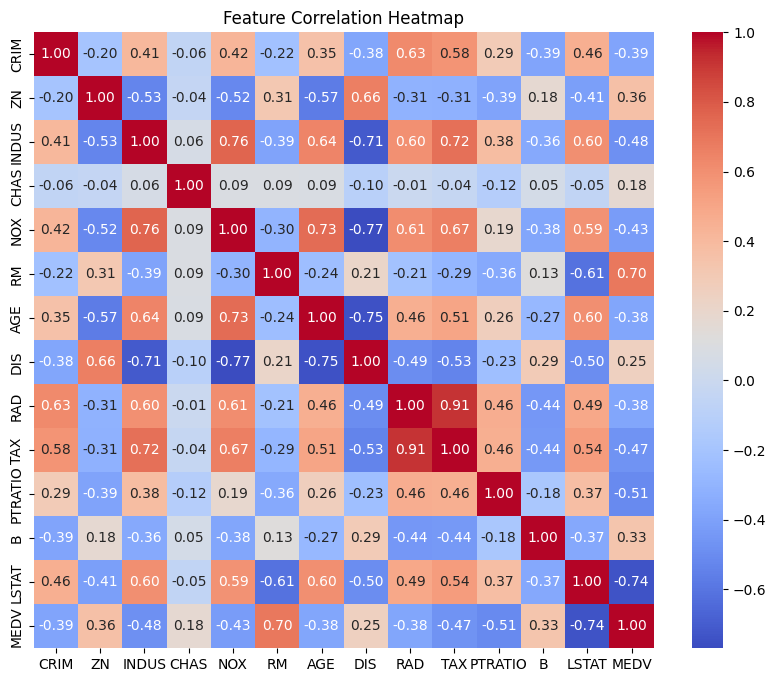

In [ ]:
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


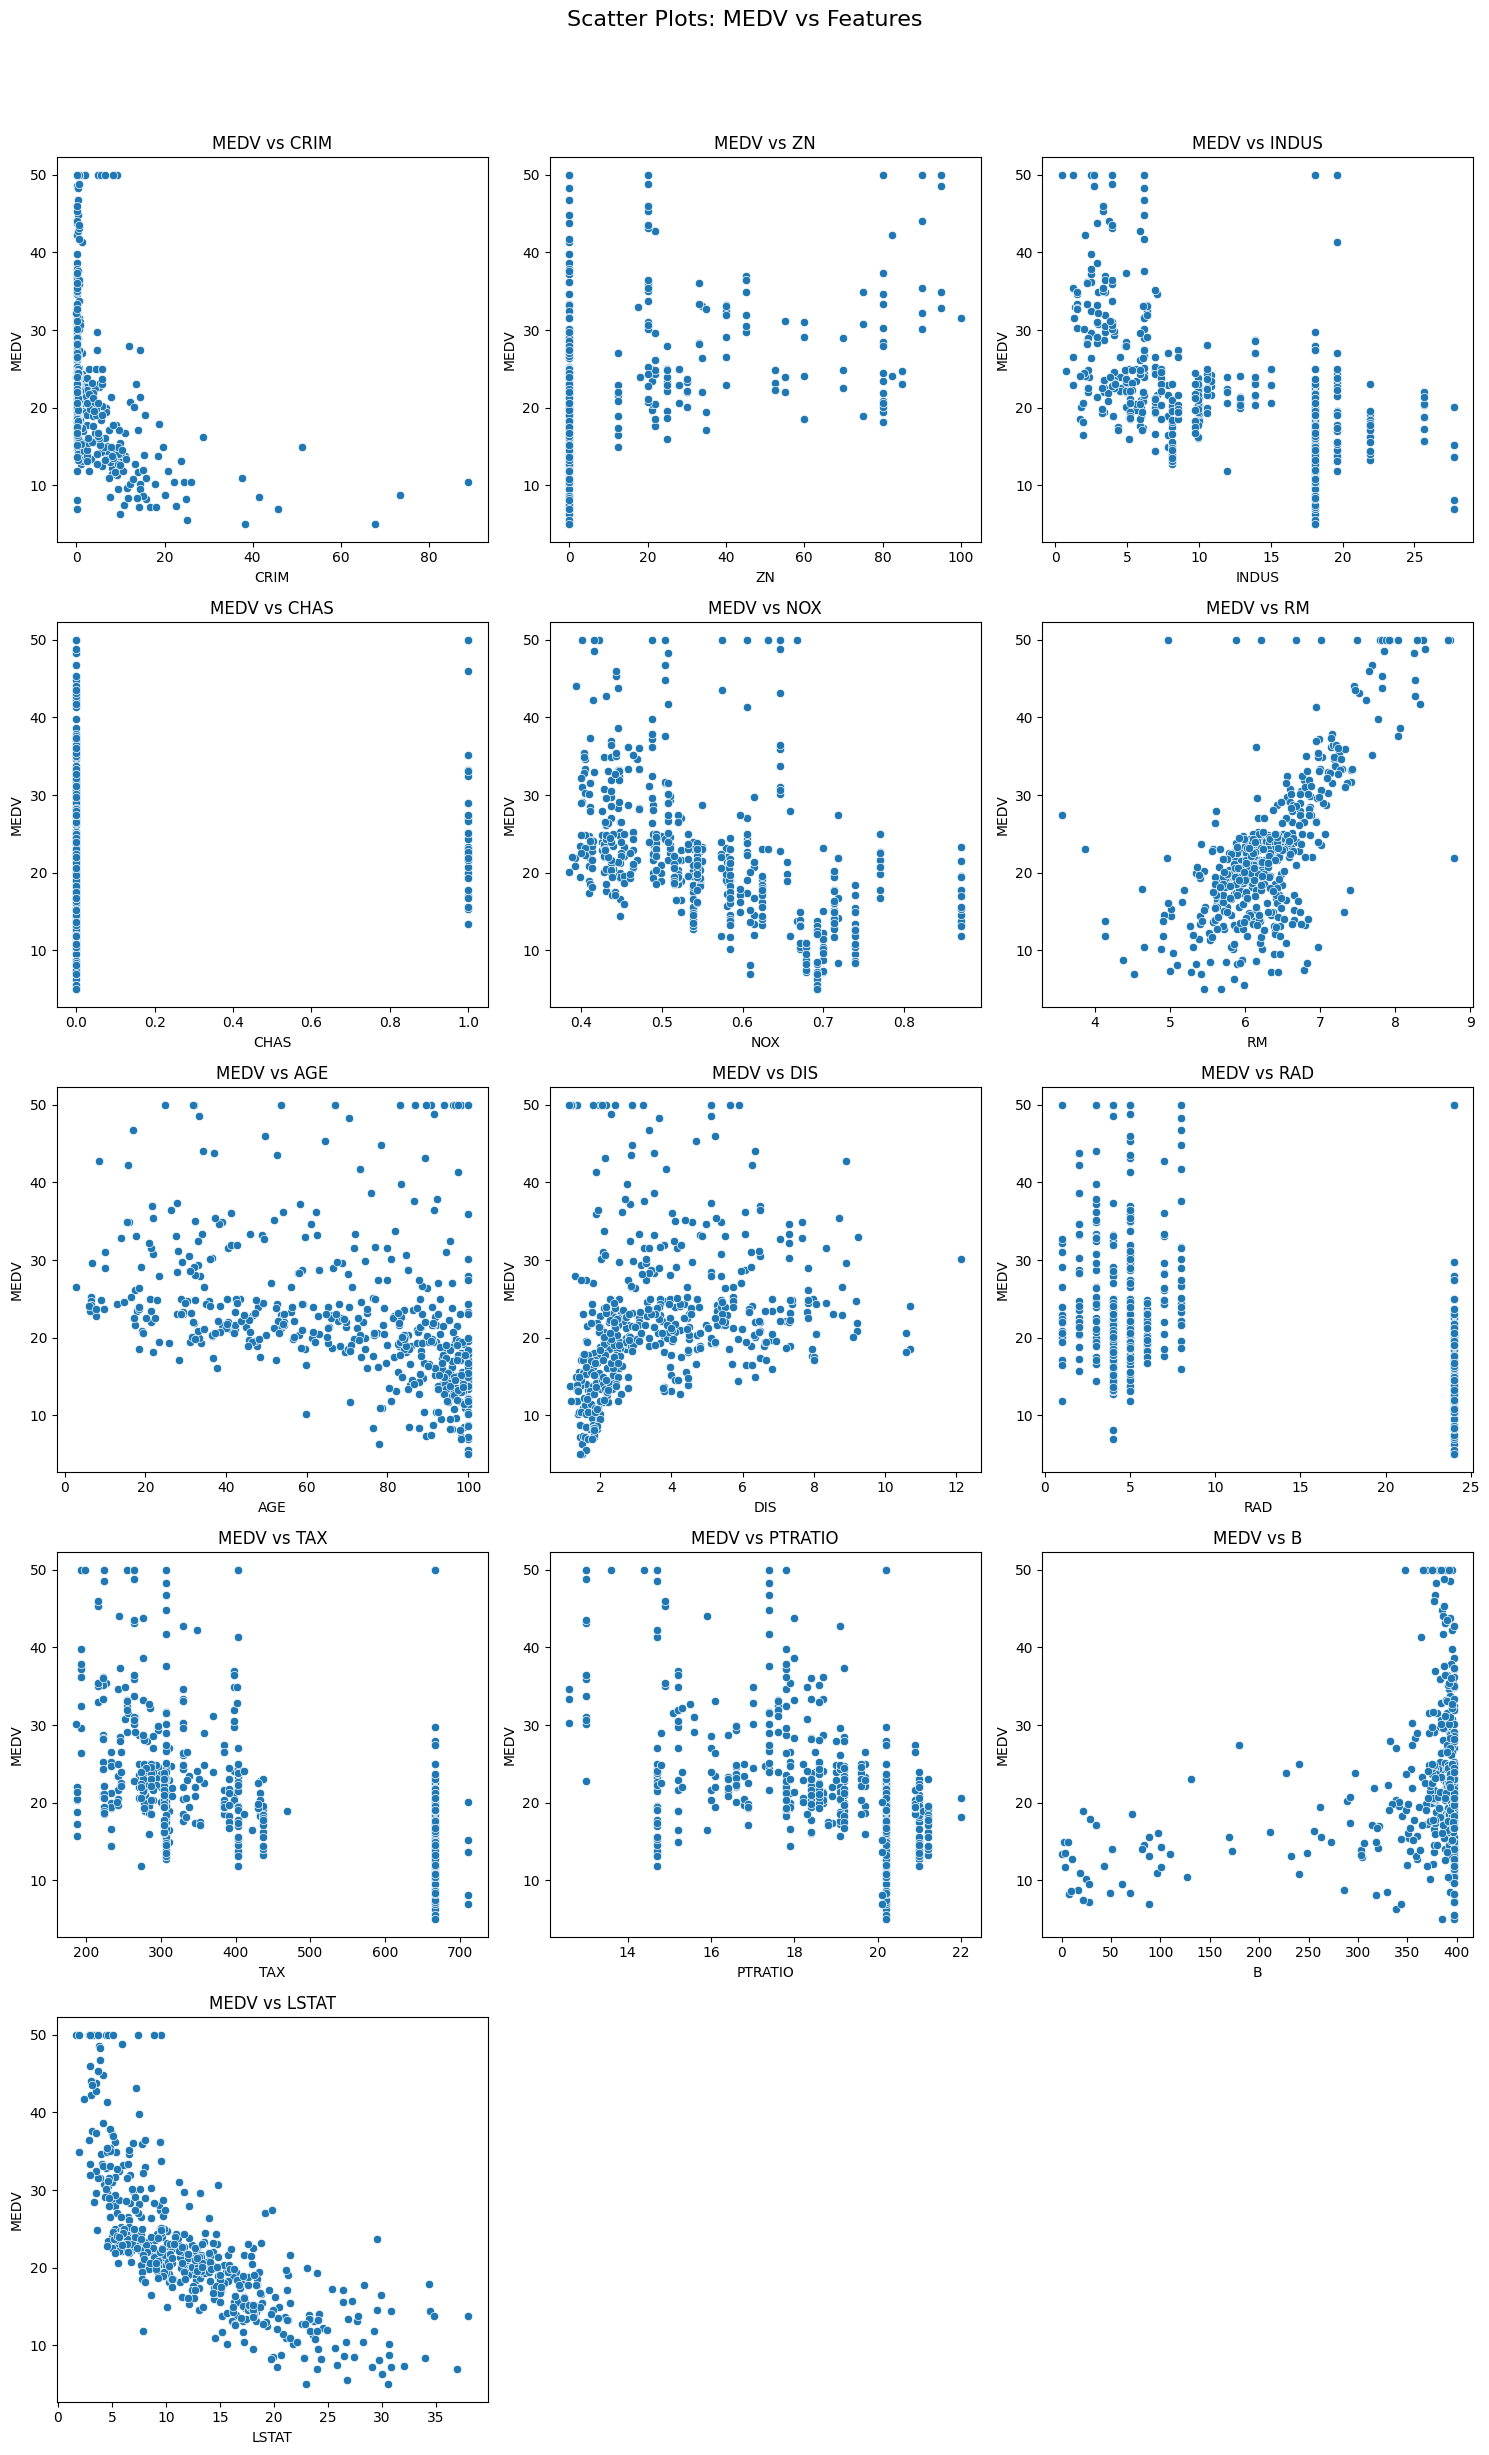

In [ ]:
# scatterplot

# Subplot ÏÑ§Ï†ï
num_features = len(df.columns) -1  # ÎèÖÎ¶Ω Î≥ÄÏàò Í∞úÏàò
cols = 3  # Ìïú Ï§ÑÏóê Îì§Ïñ¥Í∞à ÌîåÎ°Ø Ïàò
rows = (num_features + cols - 1) // cols  # Ìñâ Í∞úÏàò Í≥ÑÏÇ∞

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
fig.suptitle("Scatter Plots: MEDV vs Features", fontsize=16)

# Í∞Å ÎèÖÎ¶Ω Î≥ÄÏàòÏôÄ MEDVÏùò ÏÇ∞Ï†êÎèÑ Í∑∏Î¶¨Í∏∞
for i, column in enumerate(df.columns[:-1]):
    ax = axes[i // cols, i % cols]
    sns.scatterplot(data=df, x=column, y="MEDV", ax=ax)
    ax.set_title(f"MEDV vs {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("MEDV")

# Îπà subplot Ïà®Í∏∞Í∏∞ (ÎèÖÎ¶ΩÎ≥ÄÏàò Í∞úÏàòÍ∞Ä subplotÎ≥¥Îã§ Ï†ÅÏùÄ Í≤ΩÏö∞)
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ï†úÎ™©Í≥º Í∞ÑÍ≤© Ï°∞Ï†ï
plt.show()

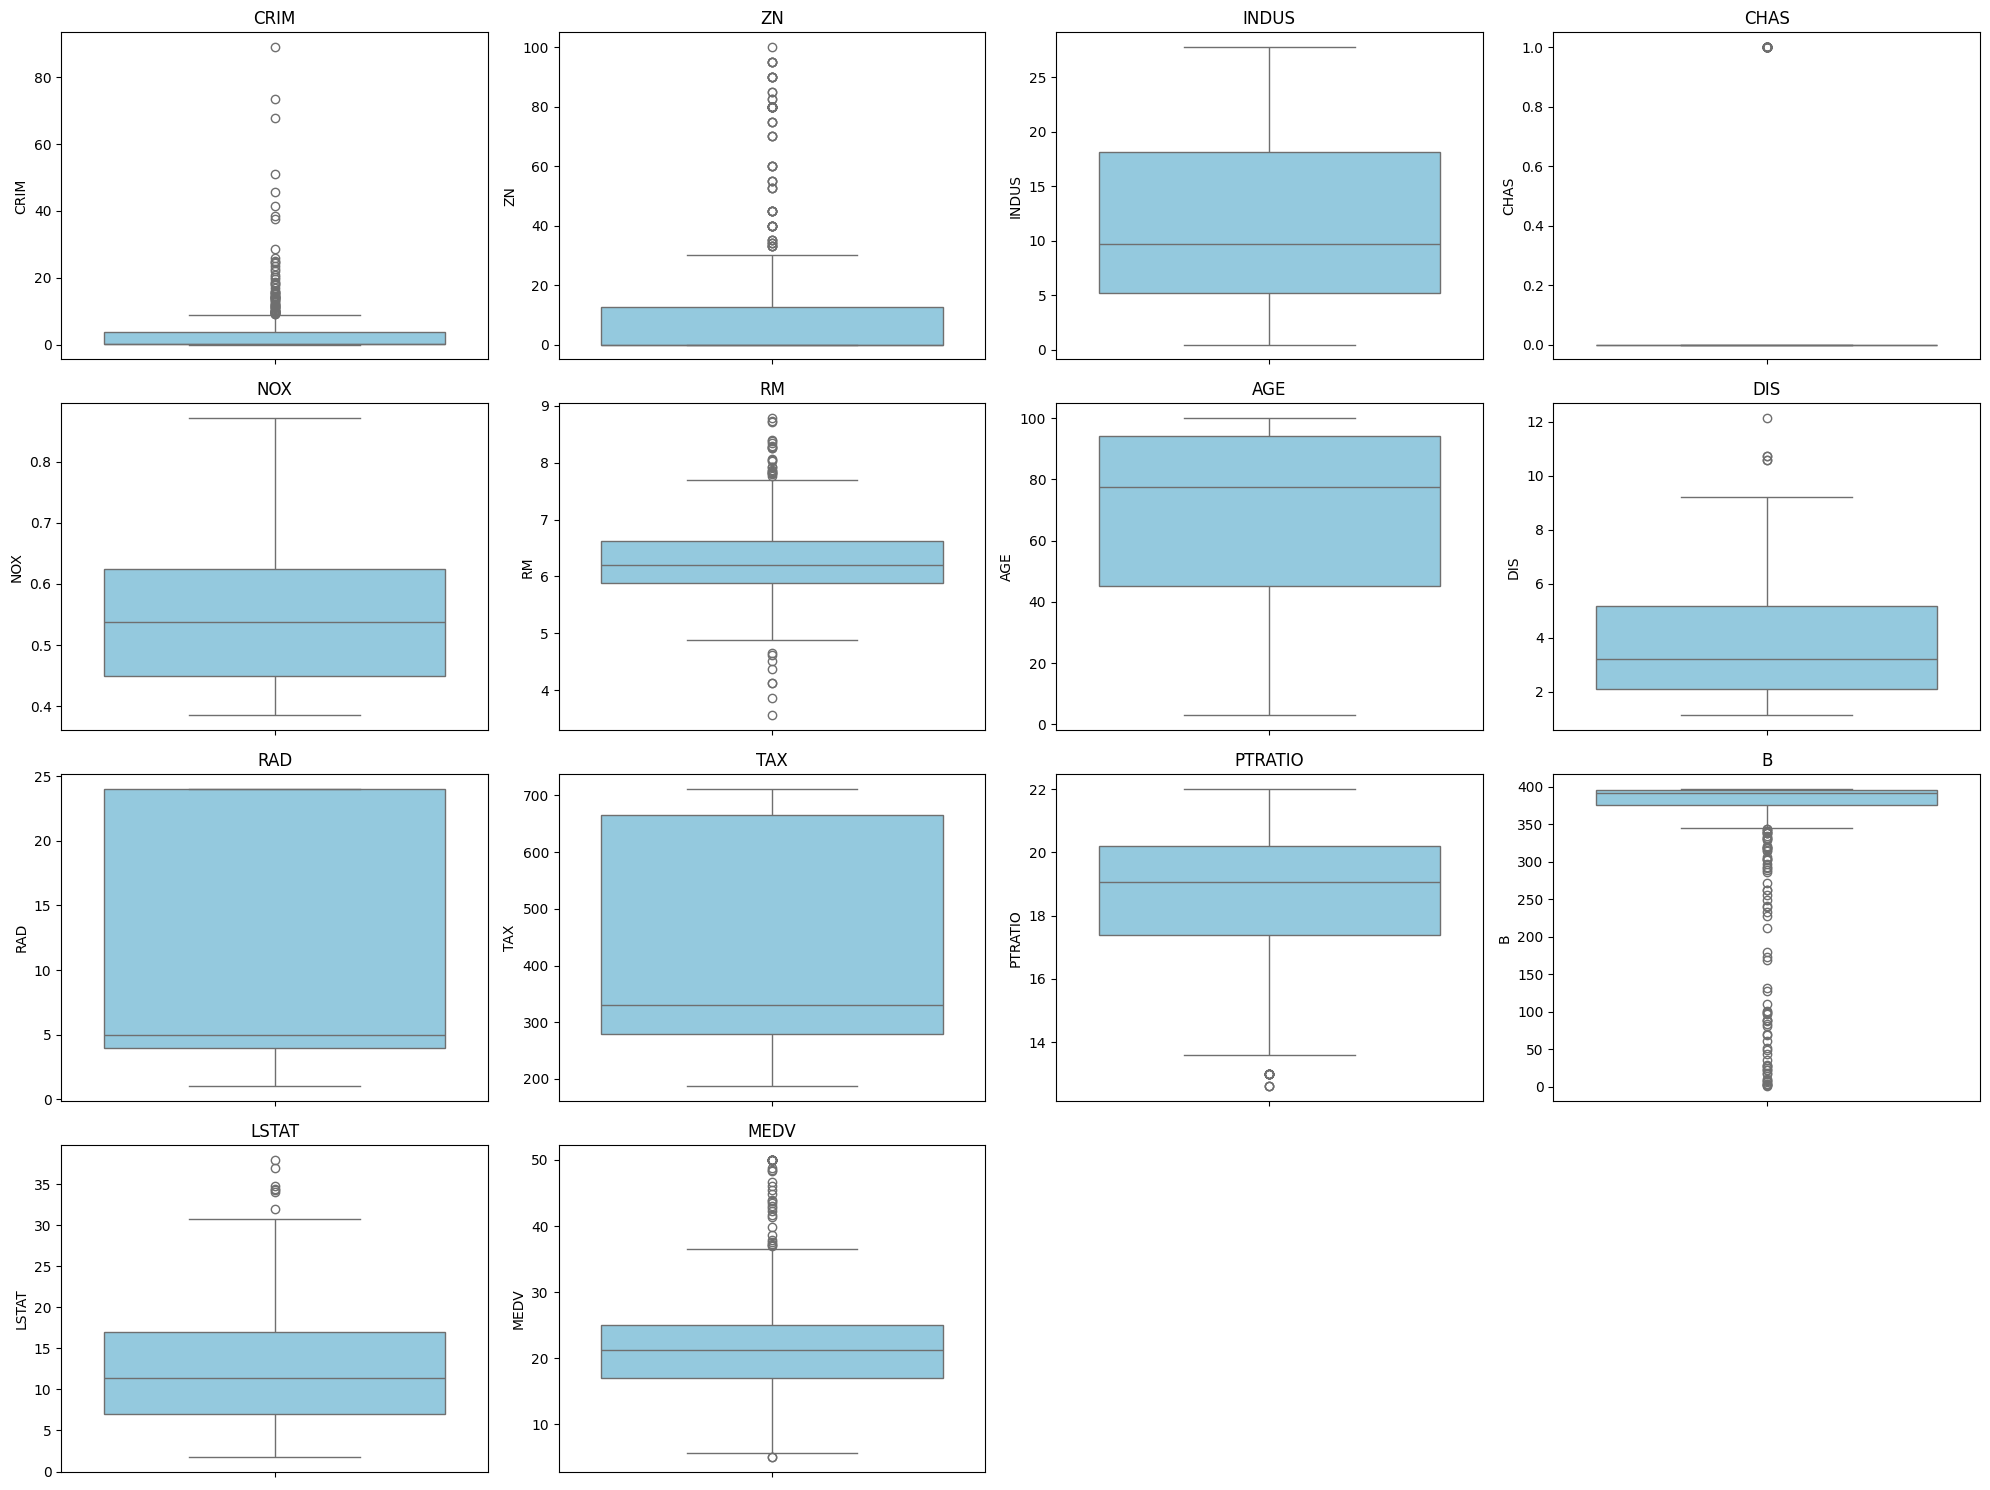

In [ ]:
# Í∞Å featureÏóê ÎåÄÌï¥ Î∞ïÏä§ÌîåÎ°Ø Í∑∏Î¶¨Í∏∞

plt.figure(figsize=(20, 15))  # Ï†ÑÏ≤¥ ÌîåÎ°Ø ÌÅ¨Í∏∞ ÏÑ§Ï†ï
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)  # 4x4 subplot ÏÉùÏÑ±
    sns.boxplot(y=df[column], color="skyblue")
    plt.title(column, fontsize=12)
    plt.tight_layout()  # ÌîåÎ°Ø Í∞ÑÍ≤© Ï°∞Ï†ï

plt.show()

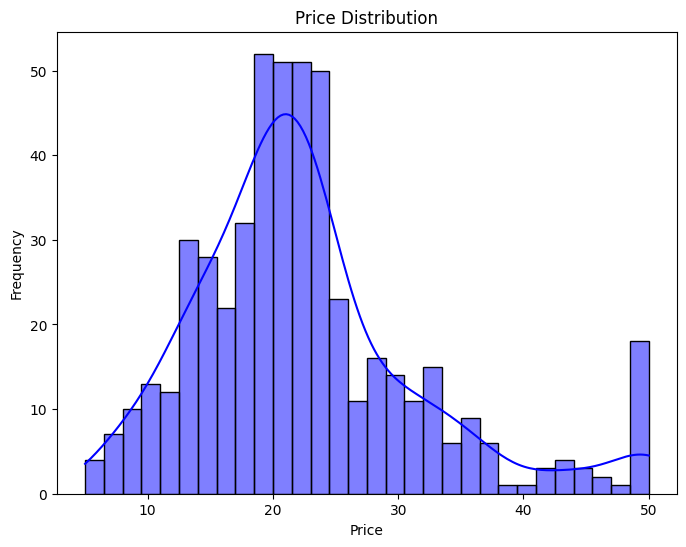

In [ ]:
# Í∞ÄÍ≤© Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.histplot(df['MEDV'], kde=True, bins=30, color="blue")
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


# 3) Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨

In [ ]:
# -------------------------------
# 3. Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
# -------------------------------

In [ ]:
from scipy.stats import zscore

# Z-score Í≥ÑÏÇ∞
z_scores = np.abs(zscore(df.drop(columns = "CHAS")))  # Ï†àÎåìÍ∞íÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ ÏñëÏàòÎ°ú ÎßåÎì¶
z_scores

CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
0    0.419782  0.284830  1.287909  0.144217  0.413672  0.120013  0.140214   
1    0.417339  0.487722  0.593381  0.740262  0.194274  0.367166  0.557160   
2    0.417342  0.487722  0.593381  0.740262  1.282714  0.265812  0.557160   
3    0.416750  0.487722  1.306878  0.835284  1.016303  0.809889  1.077737   
4    0.412482  0.487722  1.306878  0.835284  1.228577  0.511180  1.077737   
..        ...       ...       ...       ...       ...       ...       ...   
501  0.413229  0.487722  0.115738  0.158124  0.439316  0.018673  0.625796   
502  0.415249  0.487722  0.115738  0.158124  0.234548  0.288933  0.716639   
503  0.413447  0.487722  0.115738  0.158124  0.984960  0.797449  0.773684   
504  0.407764  0.487722  0.115738  0.158124  0.725672  0.736996  0.668437   
505  0.415000  0.487722  0.115738  0.158124  0.362767  0.434732  0.613246   

          RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0    0.982843  0.666608  1.459000  0.441052  1.075562  0.159686  
1    0.867883  0.987329  0.303094  0.441052  0.492439  0.101524  
2    0.867883  0.987329  0.303094  0.396427  1.208727  1.324247  
3    0.752922  1.106115  0.113032  0.416163  1.361517  1.182758  
4    0.752922  1.106115  0.113032  0.441052  1.026501  1.487503  
..        ...       ...       ...       ...       ...       ...  
501  0.982843  0.803212  1.176466  0.387217  0.418147  0.014454  
502  0.982843  0.803212  1.176466  0.441052  0.500850  0.210362  
503  0.982843  0.803212  1.176466  0.441052  0.983048  0.148802  
504  0.982843  0.803212  1.176466  0.403225  0.865302  0.057989  
505  0.982843  0.803212  1.176466  0.441052  0.669058  1.157248  

[506 rows x 13 columns]

In [ ]:

# ÏïÑÏõÉÎùºÏù¥Ïñ¥ ÏûÑÍ≥ÑÍ∞í ÏÑ§Ï†ï (|Z| > 3ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏïÑÏõÉÎùºÏù¥Ïñ¥ Ï†úÍ±∞)
threshold = 3
outliers = (z_scores > threshold)

# ÏïÑÏõÉÎùºÏù¥Ïñ¥ Ï†úÍ±∞
df_cleaned = df[(~outliers).all(axis=1)]  # Ìïú Ïó¥Ïù¥ÎùºÎèÑ ÏïÑÏõÉÎùºÏù¥Ïñ¥Î©¥ Ìï¥Îãπ Ìñâ Ï†úÍ±∞

# Ï†úÍ±∞ Ï†Ñ/ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ ÎπÑÍµê
print(f"ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df.shape}")
print(f"ÏïÑÏõÉÎùºÏù¥Ïñ¥ Ï†úÍ±∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df_cleaned.shape}")

ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (506, 14)
ÏïÑÏõÉÎùºÏù¥Ïñ¥ Ï†úÍ±∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (448, 14)


In [ ]:
# IQR Í∏∞Î∞ò ÏïÑÏõÉÎùºÏù¥Ïñ¥ ÌôïÏù∏
for k, v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
  print(f"{k} outliers = {perc:.2f}")

CRIM outliers = 13.04
ZN outliers = 13.44
INDUS outliers = 0.00
CHAS outliers = 100.00
NOX outliers = 0.00
RM outliers = 5.93
AGE outliers = 0.00
DIS outliers = 0.99
RAD outliers = 0.00
TAX outliers = 0.00
PTRATIO outliers = 2.96
B outliers = 15.22
LSTAT outliers = 1.38
MEDV outliers = 7.91


In [ ]:
# IQR Í∏∞Î∞ò ÏïÑÏõÉÎùºÏù¥Ïñ¥ Ï†úÍ±∞ Ìï®Ïàò Ï†ïÏùò
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 1ÏÇ¨Î∂ÑÏúÑÏàò
    Q3 = data[column].quantile(0.75)  # 3ÏÇ¨Î∂ÑÏúÑÏàò
    IQR = Q3 - Q1  # IQR Í≥ÑÏÇ∞
    lower_bound = Q1 - 3 * IQR  # ÌïòÌïú
    upper_bound = Q3 + 3 * IQR  # ÏÉÅÌïú
    # ÏïÑÏõÉÎùºÏù¥Ïñ¥Í∞Ä ÏïÑÎãå Îç∞Ïù¥ÌÑ∞Îßå Î∞òÌôò
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

print(f"ÏïÑÏõÉÎùºÏù¥Ïñ¥ Ï†úÍ±∞ Ï†Ñ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df.shape}")

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌï¥ ÏïÑÏõÉÎùºÏù¥Ïñ¥ Ï†úÍ±∞
for column in df.drop(columns = "CHAS").columns:
    df = remove_outliers_iqr(df, column)

# Í≤∞Í≥º ÌôïÏù∏
print(f"ÏïÑÏõÉÎùºÏù¥Ïñ¥ Ï†úÍ±∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df.shape}")

ÏïÑÏõÉÎùºÏù¥Ïñ¥ Ï†úÍ±∞ Ï†Ñ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (506, 14)
ÏïÑÏõÉÎùºÏù¥Ïñ¥ Ï†úÍ±∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (335, 14)


# 4) Îç∞Ïù¥ÌÑ∞ Ïù∏ÏΩîÎî©

In [ ]:
# -------------------------------
# 4. Îç∞Ïù¥ÌÑ∞ Ïù∏ÏΩîÎî©
# -------------------------------


In [ ]:
# CHAS Î≥ÄÏàò ÎçîÎØ∏ Ïù∏ÏΩîÎî© (ÏõêÌï´ Ïù∏ÏΩîÎî©)

#  train Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º test Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Î≤îÏ£º Í∞úÏàòÍ∞Ä Îã§Î•∏ Í≤ΩÏö∞Ïóê, ÏõêÌï´ Ïù∏ÏΩîÎî© ÏÇ¨Ïö©
# from sklearn.preprocessing import OneHotEncoder

chas_dummies = pd.get_dummies(df["CHAS"], prefix="CHAS", drop_first=False)  # ÎçîÎØ∏ Ïù∏ÏΩîÎî©

# Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê ÎçîÎØ∏ Î≥ÄÏàò Ï∂îÍ∞Ä Î∞è CHAS Ïó¥ Ï†úÍ±∞
df2 = pd.concat([df, chas_dummies], axis=1).drop(columns=["CHAS"])


In [ ]:
df2

CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0    0.00632  18.0   2.31  0.538  6.575  65.2  4.0900    1  296.0     15.3   
1    0.02731   0.0   7.07  0.469  6.421  78.9  4.9671    2  242.0     17.8   
2    0.02729   0.0   7.07  0.469  7.185  61.1  4.9671    2  242.0     17.8   
3    0.03237   0.0   2.18  0.458  6.998  45.8  6.0622    3  222.0     18.7   
4    0.06905   0.0   2.18  0.458  7.147  54.2  6.0622    3  222.0     18.7   
..       ...   ...    ...    ...    ...   ...     ...  ...    ...      ...   
501  0.06263   0.0  11.93  0.573  6.593  69.1  2.4786    1  273.0     21.0   
502  0.04527   0.0  11.93  0.573  6.120  76.7  2.2875    1  273.0     21.0   
503  0.06076   0.0  11.93  0.573  6.976  91.0  2.1675    1  273.0     21.0   
504  0.10959   0.0  11.93  0.573  6.794  89.3  2.3889    1  273.0     21.0   
505  0.04741   0.0  11.93  0.573  6.030  80.8  2.5050    1  273.0     21.0   

          B  LSTAT  MEDV  CHAS_0  CHAS_1  
0    396.90   4.98  24.0    True   False  
1    396.90   9.14  21.6    True   False  
2    392.83   4.03  34.7    True   False  
3    394.63   2.94  33.4    True   False  
4    396.90   5.33  36.2    True   False  
..      ...    ...   ...     ...     ...  
501  391.99   9.67  22.4    True   False  
502  396.90   9.08  20.6    True   False  
503  396.90   5.64  23.9    True   False  
504  393.45   6.48  22.0    True   False  
505  396.90   7.88  11.9    True   False  

[335 rows x 15 columns]

In [ ]:
df2["AGE"].describe()

count    335.000000
mean      60.502388
std       27.753101
min        2.900000
25%       36.850000
50%       62.000000
75%       86.700000
max      100.000000
Name: AGE, dtype: float64

In [ ]:
# "AGE" Î≥ÄÏàò Ïπ¥ÌÖåÍ≥†Î¶¨Ìôî (10%ÎåÄ ÎØ∏Îßå, 10%ÎåÄ, 20%ÎåÄ, 30%ÎåÄ, ... 90%ÎåÄ Ïù¥ÏÉÅ)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Í≤ΩÍ≥ÑÍ∞í ÏÑ§Ï†ï
labels = ["10%ÎåÄ ÎØ∏Îßå", "10%ÎåÄ", "20%ÎåÄ", "30%ÎåÄ", "40%ÎåÄ", "50%ÎåÄ", "60%ÎåÄ", "70%ÎåÄ", "80%ÎåÄ", "90%ÎåÄÏù¥ÏÉÅ"]  # Ïπ¥ÌÖåÍ≥†Î¶¨ Ïù¥Î¶Ñ
df2["AGE_Group"] = pd.cut(df2["AGE"], bins=bins, labels=labels, right=True)
df2[["AGE","AGE_Group"]]

AGE AGE_Group
0    65.2      60%ÎåÄ
1    78.9      70%ÎåÄ
2    61.1      60%ÎåÄ
3    45.8      40%ÎåÄ
4    54.2      50%ÎåÄ
..    ...       ...
501  69.1      60%ÎåÄ
502  76.7      70%ÎåÄ
503  91.0    90%ÎåÄÏù¥ÏÉÅ
504  89.3      80%ÎåÄ
505  80.8      80%ÎåÄ

[335 rows x 2 columns]

In [ ]:
# ÎùºÎ≤® Ïù∏ÏΩîÎî©
le = LabelEncoder()
df2["AGE_Group_Encoded"] = le.fit_transform(df2["AGE_Group"])

# Í≤∞Í≥º ÌôïÏù∏
print(df2[["AGE", "AGE_Group", "AGE_Group_Encoded"]].head())

    AGE AGE_Group  AGE_Group_Encoded
0  65.2      60%ÎåÄ                  6
1  78.9      70%ÎåÄ                  7
2  61.1      60%ÎåÄ                  6
3  45.8      40%ÎåÄ                  4
4  54.2      50%ÎåÄ                  5


# 5) Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†

In [ ]:
# -------------------------------
# 5. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
# -------------------------------
X = df.drop(columns = "MEDV")
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6) Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ

In [ ]:
# -------------------------------
# 6. Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
68   0.13554  12.5   6.07     0  0.409  5.594   36.8  6.4980    4  345.0   
259  0.65665  20.0   3.97     0  0.647  6.842  100.0  2.0107    5  264.0   
212  0.21719   0.0  10.59     1  0.489  5.807   53.8  3.6526    4  277.0   
316  0.31827   0.0   9.90     0  0.544  5.914   83.2  3.9986    4  304.0   
17   0.78420   0.0   8.14     0  0.538  5.990   81.7  4.2579    4  307.0   
..       ...   ...    ...   ...    ...    ...    ...     ...  ...    ...   
220  0.35809   0.0   6.20     1  0.507  6.951   88.5  2.8617    8  307.0   
79   0.08387   0.0  12.83     0  0.437  5.874   36.6  4.5026    5  398.0   
115  0.17134   0.0  10.01     0  0.547  5.928   88.2  2.4631    6  432.0   
306  0.07503  33.0   2.18     0  0.472  7.420   71.9  3.0992    7  222.0   
111  0.10084   0.0  10.01     0  0.547  6.715   81.6  2.6775    6  432.0   

     PTRATIO       B  LSTAT  
68      18.9  396.90  13.09  
259     13.0  391.93   6.90  
212     18.6  390.94  16.03  
316     18.4  390.70  18.33  
17      21.0  386.75  14.67  
..       ...     ...    ...  
220     17.4  391.70   9.71  
79      18.7  396.06   9.10  
115     17.8  344.91  15.76  
306     18.4  396.90   6.47  
111     17.8  395.59  10.16  

[268 rows x 13 columns]

In [ ]:
X_train_scaled

array([[-0.35240694, -0.04748791, -0.37311695, ...,  0.44274088,
         0.72727989,  0.51032508],
       [ 0.66322355,  0.29340743, -0.73637155, ..., -2.29722733,
         0.24551072, -0.60799211],
       [-0.19327311, -0.61564681,  0.40874534, ...,  0.30342046,
         0.14954463,  1.04148058],
       ...,
       [-0.28263363, -0.61564681,  0.30841787, ..., -0.06810065,
        -4.31239397,  0.99270099],
       [-0.47033943,  0.8842927 , -1.04600286, ...,  0.21054018,
         0.72727989, -0.68567812],
       [-0.42003638, -0.61564681,  0.30841787, ..., -0.06810065,
         0.60029445, -0.01902377]])

# 7) Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä

In [ ]:
# -------------------------------
# 7. Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
# -------------------------------

# Í≤∞Í≥º Ï†ÄÏû•ÏùÑ ÏúÑÌïú ÎîïÏÖîÎÑàÎ¶¨
results = {}


# 7-1) ÏÑ†Ìòï ÌöåÍ∑Ä

In [ ]:
# 1) ÏÑ†Ìòï ÌöåÍ∑Ä
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)

# Í≤∞Í≥º Ï∂úÎ†•
print("Linear Model Results")
print(f"MSE: {mse_linear:.4f}")
print(f"R2: {r2_linear:.4f}")
print(f"MAE: {mae_linear:.4f}")
print(f"MAPE: {mape_linear:.2f}%")

results["Linear Regression"] = {"MSE": mse_linear, "R2": r2_linear, "MAE": mae_linear, "MAPE": mape_linear, "Best Params": ""}

Linear Model Results
MSE: 10.4074
R2: 0.8052
MAE: 2.3232
MAPE: 9.38%


In [ ]:
# ÌöåÍ∑ÄÍ≥ÑÏàò Î∞è Ï†àÌé∏ Ï∂îÏ∂ú
coefficients = linear_model.coef_
intercept = linear_model.intercept_

# ÌöåÍ∑ÄÍ≥ÑÏàòÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Ï∂úÎ†•
print(f"Intercept (Ï†àÌé∏): {intercept:.2f}")
print("\nCoefficients (ÌöåÍ∑ÄÍ≥ÑÏàò):")
print(coef_df)

Intercept (Ï†àÌé∏): -10.23

Coefficients (ÌöåÍ∑ÄÍ≥ÑÏàò):
    Feature  Coefficient
5        RM     9.039238
0      CRIM     1.320788
3      CHAS     1.056982
8       RAD     0.208407
2     INDUS     0.022998
11        B     0.005973
1        ZN     0.002261
9       TAX    -0.012479
6       AGE    -0.041802
12    LSTAT    -0.100203
10  PTRATIO    -0.624629
7       DIS    -0.804104
4       NOX    -9.217550


In [ ]:
import statsmodels.api as sm

# ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä (Ï†àÌé∏ Ìè¨Ìï®)
X = sm.add_constant(X)

# OLS ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
model = sm.OLS(y, X)  # OLS: Ordinary Least Squares
results_lr = model.fit()

# ÌöåÍ∑Ä Í≤∞Í≥º ÏöîÏïΩ Ï∂úÎ†•
print(results_lr.summary())

# ÌöåÍ∑ÄÍ≥ÑÏàòÏôÄ p-value Ï∂îÏ∂ú
coef_pval_df = pd.DataFrame({
    "Coefficient": round(results_lr.params,3),
    "P-value": round(results_lr.pvalues,3)
}).sort_values(by="P-value")

# Ï∂úÎ†•
print("\nCoefficients and P-values:")
print(coef_pval_df)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     151.7
Date:                Fri, 31 Jan 2025   Prob (F-statistic):          1.98e-128
Time:                        08:38:44   Log-Likelihood:                -845.24
No. Observations:                 335   AIC:                             1718.
Df Residuals:                     321   BIC:                             1772.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.7647      8.019     -1.218      0.2

# 7-2) ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏

In [ ]:
rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

# Í≤∞Í≥º Ï∂úÎ†•
print("RandomForest Results")
print(f"MSE: {mse_rf:.4f}")
print(f"R2: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"MAPE: {mape_rf:.2f}%")
print(f"Params: \n")
rf_model.get_params()

RandomForest Results
MSE: 7.1599
R2: 0.8660
MAE: 1.9531
MAPE: 7.85%
Params: 



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ (GridSearchCV ÏÇ¨Ïö©)
# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ Ï¥àÍ∏∞Ìôî
rf_model = RandomForestRegressor(random_state=42)

# GridSearchCVÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring="r2", n_jobs=-1)
rf_grid.fit(X_train, y_train)

# ÏµúÏ†Å Î™®Îç∏Í≥º ÏòàÏ∏° Í≤∞Í≥º Í≥ÑÏÇ∞
best_rf_model = rf_grid.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

# Í≤∞Í≥º Ï∂úÎ†•
print("RandomForest Results")
print(f"MSE: {mse_rf:.4f}")
print(f"R2: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"MAPE: {mape_rf:.2f}%")
print(f"Best Params: {rf_grid.best_params_}")

results["Random Forest"] = {"MSE": mse_rf, "R2": r2_rf, "MAE": mae_rf, "MAPE": mape_rf, "Best Params": rf_grid.best_params_}

RandomForest Results
MSE: 7.5284
R2: 0.8591
MAE: 1.9933
MAPE: 7.99%
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


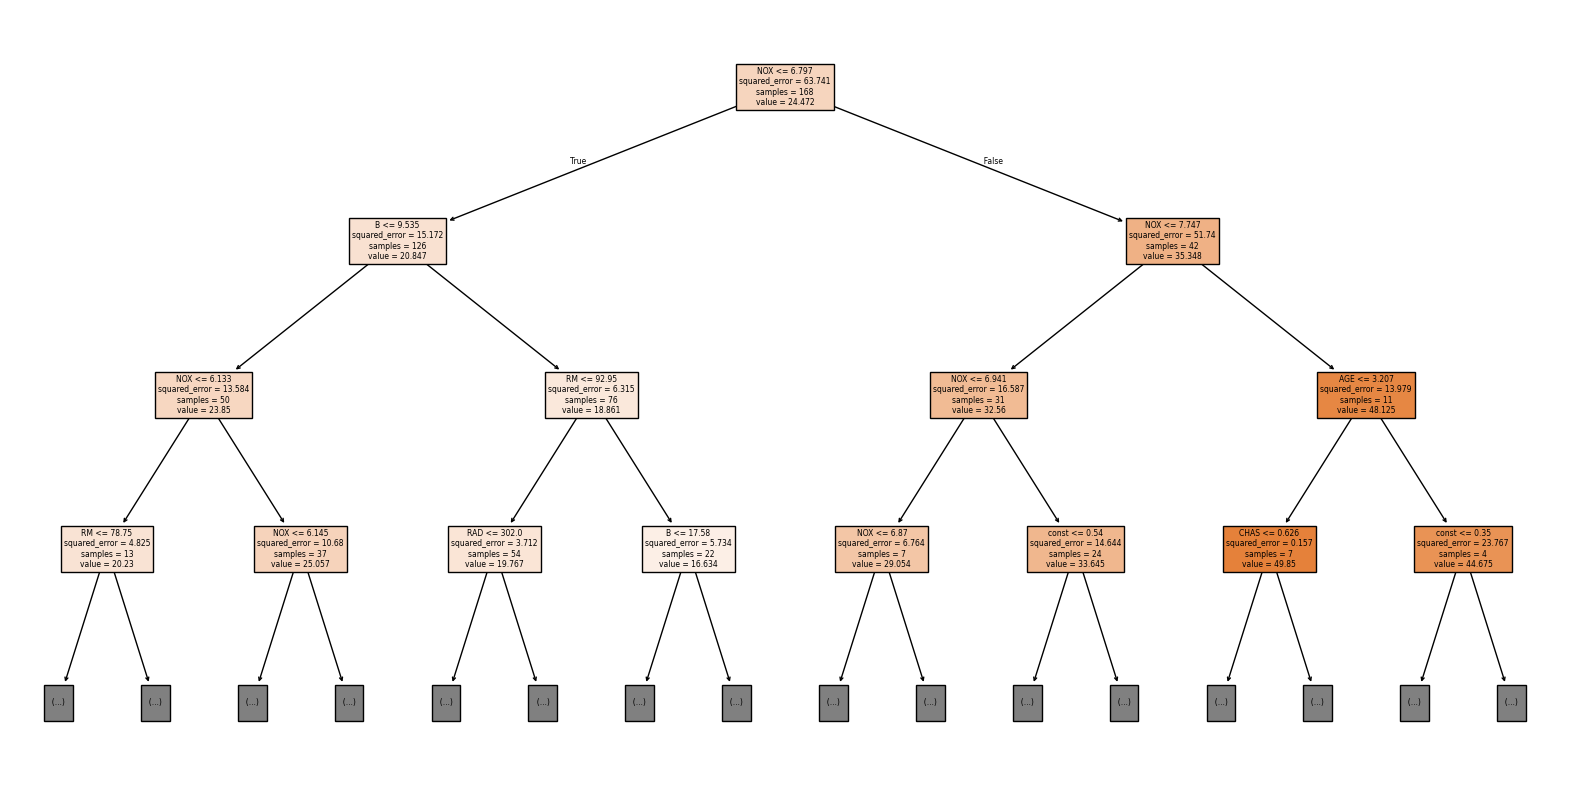

In [ ]:
# Ï≤´ Î≤àÏß∏ Ìä∏Î¶¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(20,10))
plot_tree(best_rf_model.estimators_[0], max_depth = 3, filled=True, feature_names=X.columns)
plt.show()

# 7-3) XGBoost

In [ ]:
# XGBoost Î™®Îç∏ Ï¥àÍ∏∞Ìôî
xgb_model = XGBRegressor(random_state=42, eval_metric="rmse")

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

# Í≤∞Í≥º Ï∂úÎ†•
print("XGBoost Results")
print(f"MSE: {mse_xgb:.4f}")
print(f"R2: {r2_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"MAPE: {mape_xgb:.2f}%")
print(f"Params: \n")
xgb_model.get_params()

XGBoost Results
MSE: 8.4068
R2: 0.8427
MAE: 2.0456
MAPE: 8.13%
Params: 



{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'rmse',
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
# XGBoost (GridSearchCV ÏÇ¨Ïö©)

# XGBoost ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
xgb_params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 6]
}

# XGBoost Î™®Îç∏ Ï¥àÍ∏∞Ìôî
xgb_model = XGBRegressor(random_state=42, eval_metric="rmse")

# GridSearchCVÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring="r2", n_jobs=-1)
xgb_grid.fit(X_train, y_train)

# ÏµúÏ†Å Î™®Îç∏Í≥º ÏòàÏ∏° Í≤∞Í≥º Í≥ÑÏÇ∞
best_xgb_model = xgb_grid.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

# Í≤∞Í≥º Ï∂úÎ†•
print("XGBoost Results")
print(f"MSE: {mse_xgb:.4f}")
print(f"R2: {r2_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"MAPE: {mape_xgb:.2f}%")
print(f"Best Params: {xgb_grid.best_params_}")

results["XGBoost"] = {"MSE": mse_xgb, "R2": r2_xgb, "MAE": mae_xgb, "MAPE": mape_xgb, "Best Params": xgb_grid.best_params_}

XGBoost Results
MSE: 5.8138
R2: 0.8912
MAE: 1.7556
MAPE: 7.24%
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [ ]:
best_xgb_model.feature_names_in_

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
best_xgb_model.feature_importances_

array([0.00457123, 0.00680018, 0.0069388 , 0.01445555, 0.03206864,
       0.6972496 , 0.02049127, 0.01276391, 0.01638941, 0.04751695,
       0.04139959, 0.00660903, 0.09274579], dtype=float32)

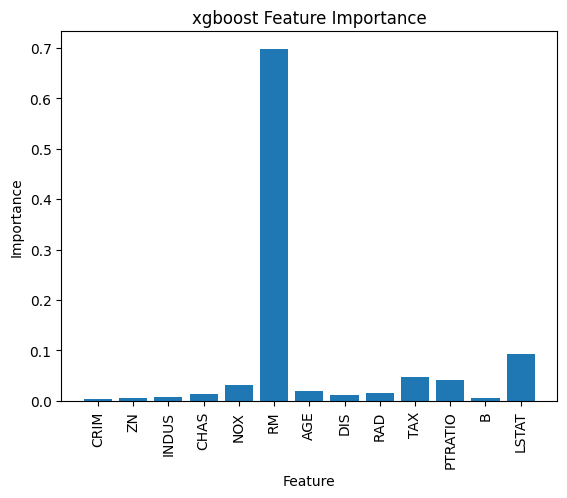

In [ ]:
# Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî1
importance = best_xgb_model.feature_importances_
importance_df = pd.DataFrame({'Feature':best_xgb_model.feature_names_in_, 'Importance':importance})

plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('xgboost Feature Importance')
plt.xticks(rotation = 90)
plt.show()

<Figure size 1000x800 with 0 Axes>

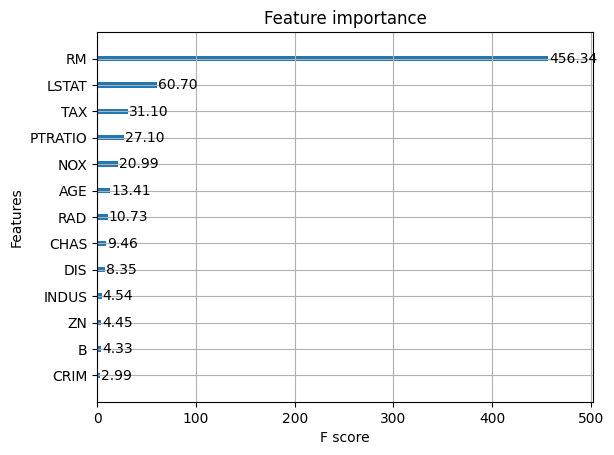

In [ ]:
# Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî2
plt.figure(figsize=(10,8))
xgb.plot_importance(best_xgb_model, importance_type='gain', values_format = "{v:.2f}")  # feature importance
plt.show()

Í∏∞Î≥∏Í∞í: importance_type='weight'

- weight: Í∞Å ÌäπÏÑ±Ïù¥ Î∂ÑÌï†Ïóê ÏÇ¨Ïö©Îêú ÌöüÏàò. Ïù¥ Í∞íÏùÄ Ìï¥Îãπ ÌäπÏÑ±Ïù¥ Î™®Îç∏ÏóêÏÑú ÏñºÎßàÎÇò ÏûêÏ£º ÏÇ¨Ïö©ÎêòÏóàÎäîÏßÄÎ•º ÎÇòÌÉÄÎÉÑ
- gain: Í∞Å ÌäπÏÑ±Ïù¥ Î∂ÑÌï†ÏóêÏÑú ÏñªÏùÄ ÌèâÍ∑†Ï†ÅÏù∏ Ï†ïÎ≥¥ Ïù¥Îìù. Ï¶â, Ìï¥Îãπ ÌäπÏÑ±Ïù¥ ÏñºÎßàÎÇò Ï§ëÏöîÌïú Î∂ÑÌï†ÏùÑ ÎßåÎì§ÏóàÎäîÏßÄÎ•º ÎÇòÌÉÄÎÉÑ
- cover: Í∞Å ÌäπÏÑ±Ïù¥ Î∂ÑÌï†ÏóêÏÑú Ï∞®ÏßÄÌïòÎäî ÏÉòÌîå ÎπÑÏú®. Ï¶â, Ìï¥Îãπ ÌäπÏÑ±Ïù¥ Î™®Îç∏ÏóêÏÑú ÏñºÎßàÎÇò ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨ÌñàÎäîÏßÄÎ•º ÎÇòÌÉÄÎÉÑ

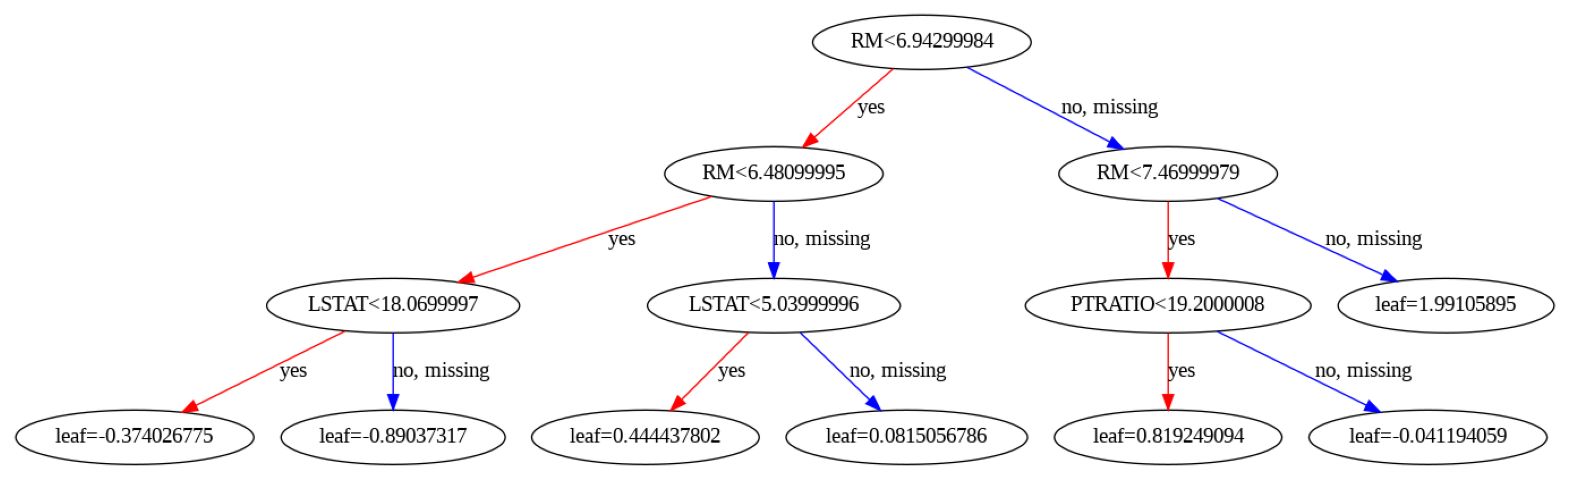

In [ ]:
# Ï≤´ Î≤àÏß∏ Ìä∏Î¶¨ ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(figsize=(20, 10))
xgb.plot_tree(best_xgb_model, num_trees=0, dpi = 300, ax = ax)  # 0Î≤àÏß∏ Ìä∏Î¶¨ ÏãúÍ∞ÅÌôî
# plt.savefig('tree_visualization.png', dpi=300)
plt.show()

# 8) Í≤∞Í≥º ÎπÑÍµê

In [ ]:
# -------------------------------
# 8. Í≤∞Í≥º ÎπÑÍµê
# -------------------------------
print("\nÎ™®Îç∏Î≥Ñ ÏÑ±Îä• ÎπÑÍµê:")
for model, metrics in results.items():
    print(f"{model}: MSE= {metrics['MSE']:.2f}, MAPE={metrics['MAPE']:.2f}%, R2={metrics['R2']:.2f}")
    if "Best Params" in metrics:
        print(f"    Best Params: {metrics['Best Params']}")



Î™®Îç∏Î≥Ñ ÏÑ±Îä• ÎπÑÍµê:
Linear Regression: MSE= 10.41, MAPE=9.38%, R2=0.81
    Best Params: 
Random Forest: MSE= 7.53, MAPE=7.99%, R2=0.86
    Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
XGBoost: MSE= 5.81, MAPE=7.24%, R2=0.89
    Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [ ]:
results_df = pd.DataFrame(results).transpose()

# Í∏¥ Î¨∏ÏûêÏó¥Ïù¥ ÏûòÎ¶¨ÏßÄ ÏïäÎèÑÎ°ù ÏÑ§Ï†ï
pd.set_option('display.max_colwidth', None)
display(results_df)

MSE        R2       MAE      MAPE  \
Linear Regression  10.407398  0.805248  2.323192  9.383351   
Random Forest       7.528437  0.859121  1.993306  7.994204   
XGBoost             5.813788  0.891207   1.75563  7.239828   

                                                                        Best Params  
Linear Regression                                                                    
Random Forest      {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}  
XGBoost                 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

# 9) Í≤∞Í≥º Ìï¥ÏÑù

**1. MSE (Mean Squared Error):**
ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞íÏùò Ï∞®Ïù¥Î•º Ï†úÍ≥±Ìïú ÌõÑ ÌèâÍ∑†ÏùÑ Íµ¨Ìïú Í∞í.

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

ÌäπÏßï:

- Ïò§Ï∞®Í∞Ä Ï†úÍ≥±ÎêòÎØÄÎ°ú ÌÅ∞ Ïò§Ï∞®Ïóê Îçî ÌÅ∞ Ìå®ÎÑêÌã∞Î•º Î∂ÄÏó¨
- Îã®ÏúÑÍ∞Ä Ï¢ÖÏÜç Î≥ÄÏàòÏùò Ï†úÍ≥± Îã®ÏúÑ(Ïòà: Ïã§Ï†úÍ∞íÏù¥ "dollars"Î©¥ MSEÎäî "dollars¬≤").

Í∏∞Ï§Ä:

- Í∞íÏù¥ ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå.
- Îç∞Ïù¥ÌÑ∞Ïùò Ïä§ÏºÄÏùºÍ≥º Î™©ÌëúÏóê Îî∞Îùº Ìï¥ÏÑù.

**2. MAE (Mean Absolute Error):**
ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞íÏùò Ï∞®Ïù¥Ïùò Ï†àÎåÄÍ∞í ÌèâÍ∑†.

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

ÌäπÏßï:

- Ïò§Ï∞®Ïùò Ï†àÎåÄÍ∞íÏùÑ Í≥ÑÏÇ∞ÌïòÎØÄÎ°ú Î™®Îì† Ïò§Ï∞®Ïóê ÎèôÏùºÌïú Ï§ëÏöîÎèÑÎ•º Î∂ÄÏó¨
- Îã®ÏúÑÎäî Ï¢ÖÏÜç Î≥ÄÏàòÏôÄ ÎèôÏùº(Ïòà: Ïã§Ï†úÍ∞íÏù¥ "dollars"Î©¥ MAEÎèÑ "dollars").
- MSEÎ≥¥Îã§ ÏßÅÍ¥ÄÏ†ÅÏù¥ÎØÄÎ°ú ÌèâÍ∑† Ïò§Ï∞® ÌÅ¨Í∏∞Î•º Î∞îÎ°ú Ïù¥Ìï¥Ìï† Ïàò ÏûàÏùå.

Í∏∞Ï§Ä:

- Í∞íÏù¥ ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå.
- Îç∞Ïù¥ÌÑ∞Ïóê Í∑πÎã®Ï†ÅÏù∏ ÏïÑÏõÉÎùºÏù¥Ïñ¥Í∞Ä ÎßéÍ±∞ÎÇò, MSEÍ∞Ä ÏïÑÏõÉÎùºÏù¥Ïñ¥Ïùò ÏòÅÌñ•ÏùÑ ÎßéÏù¥ Î∞õÎäî Í≤ΩÏö∞ MAEÍ∞Ä Îçî Ï†ÅÌï©.
- Îç∞Ïù¥ÌÑ∞Ïùò Ïä§ÏºÄÏùºÏóê Îî∞Îùº Í≤∞Í≥ºÎ•º Ìï¥ÏÑùÌï¥Ïïº Ìï®


**3. MAPE (Mean Absolute Percentage Error):**

$$
\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100
$$


**4. R¬≤ Score (Coefficient of Determination):**
ÏòàÏ∏°Í∞íÏù¥ Ïã§Ï†úÍ∞íÏùÑ ÏñºÎßàÎÇò Ïûò ÏÑ§Î™ÖÌïòÎäîÏßÄ ÎÇòÌÉÄÎÇ¥Îäî ÎπÑÏú®.

$$
\text{R^2} = 1 - \frac{RSS}{TSS}
$$

RSS (Residual Sum of Squares):

$$
\text{RSS} = \sum{(y_i - \hat{y}_i)^2}
$$

TSS (Total Sum of Squares):
$$
\text{TSS} = \sum{(y_i - \bar{y})^2}
$$

$$
y_i: Ïã§Ï†ú Í∞í,
\hat{y}_i: ÏòàÏ∏° Í∞í,
\bar{y}: Ïã§Ï†ú Í∞íÏùò ÌèâÍ∑†
$$

ÏùºÎ∞òÏ†ÅÏúºÎ°ú
- ùëÖ2 ‚â• 0.6Ïù¥Î©¥ "Ïì∏ÎßåÌïòÎã§"Í≥† ÌèâÍ∞Ä.

- R 2Í∞Ä 0.8~0.9 Ïù¥ÏÉÅÏù¥Î©¥ Îß§Ïö∞ ÎÜíÏùÄ ÏÑ§Î™ÖÎ†•ÏùÑ Í∞ÄÏßê.

- R2Í∞Ä ÎÑàÎ¨¥ ÎÜíÏúºÎ©¥ Ïò§ÌûàÎ†§ Í≥ºÏ†ÅÌï©ÏùÑ ÏùòÏã¨Ìï¥Ïïº Ìï† ÏàòÎèÑ ÏûàÏùå.

- R2Í∞Ä ÎÇÆÏïÑÎèÑ MAEÎÇò MSEÍ∞Ä ÏûëÏúºÎ©¥ Î™®Îç∏Ïù¥ Ïó¨Ï†ÑÌûà Ïú†Ïö©Ìï† Ïàò ÏûàÏùå(ÌäπÌûà Îç∞Ïù¥ÌÑ∞Ïóê ÎßéÏùÄ ÎÖ∏Ïù¥Ï¶àÍ∞Ä ÏûàÎäî Í≤ΩÏö∞).

In [ ]:
# ÌèâÍ∑†Í∞í ÏòàÏ∏°ÌïòÎäî Í∏∞Ï§Ä Î™®Îç∏Í≥º ÎπÑÍµê

from sklearn.dummy import DummyRegressor

# ÌèâÍ∑†Í∞íÏùÑ ÏòàÏ∏°ÌïòÎäî DummyRegressor Î™®Îç∏
dummy_model = DummyRegressor(strategy='mean')

# Î™®Îç∏ ÌïôÏäµ
dummy_model.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred_dummy = dummy_model.predict(X_test)

# ÏÑ±Îä• ÏßÄÌëú Í≥ÑÏÇ∞
mse_dummy = mean_squared_error(y_test, y_pred_dummy)
mae_dummy = mean_absolute_error(y_test, y_pred_dummy)
r2_dummy = r2_score(y_test, y_pred_dummy)

# Í≤∞Í≥º Ï∂úÎ†•
print("Dummy Model Performance (Predicting Mean Value)")
print(f"MSE: {mse_dummy:.4f}")
print(f"MAE: {mae_dummy:.4f}")
print(f"R2: {r2_dummy:.4f}")

Dummy Model Performance (Predicting Mean Value)
MSE: 53.4553
MAE: 5.2202
R2: -0.0003


## XGBoost Í≤∞Í≥º
* MSE:	5.813788
* R2: 0.891207
* MAE:	1.75563
* MAPE: 7.239828

* Î™®Îç∏Ïù¥ **ÏïΩ 89%**Ïùò Î∂ÑÏÇ∞ÏùÑ ÏÑ§Î™ÖÌïúÎã§.
* Ïã§Ï†úÍ∞íÍ≥º ÏòàÏ∏°Í∞íÏùÄ ÌèâÍ∑† 1,756Îã¨Îü¨ Ï∞®Ïù¥Í∞Ä ÎÇúÎã§. (250ÎßåÏõê)
* ÏòàÏ∏°Ïù¥ Ïã§Ï†ú Í∞íÍ≥º ÌèâÍ∑†Ï†ÅÏúºÎ°ú ÏïΩ 7.24% Î≤óÏñ¥ÎÇúÎã§

In [ ]:
df['MEDV'].describe()

count    335.000000
mean      24.749254
std        8.075634
min        7.000000
25%       19.550000
50%       22.800000
75%       28.300000
max       50.000000
Name: MEDV, dtype: float64

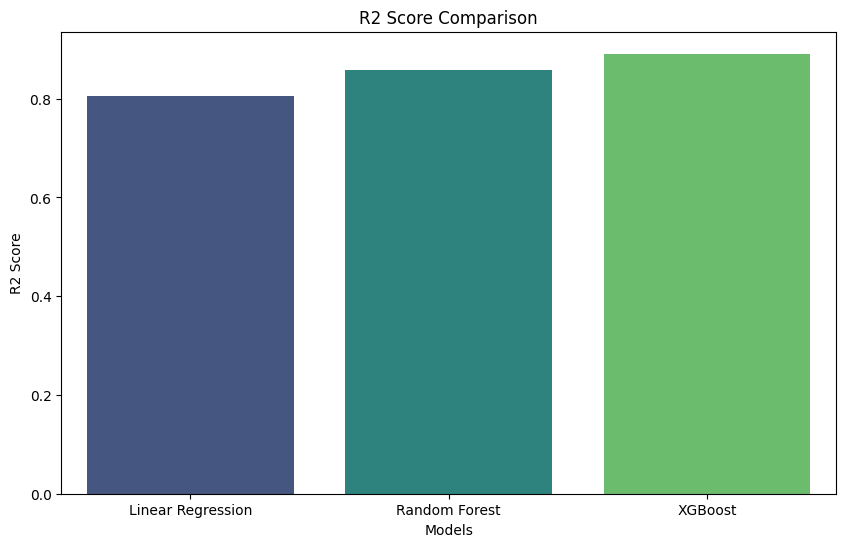

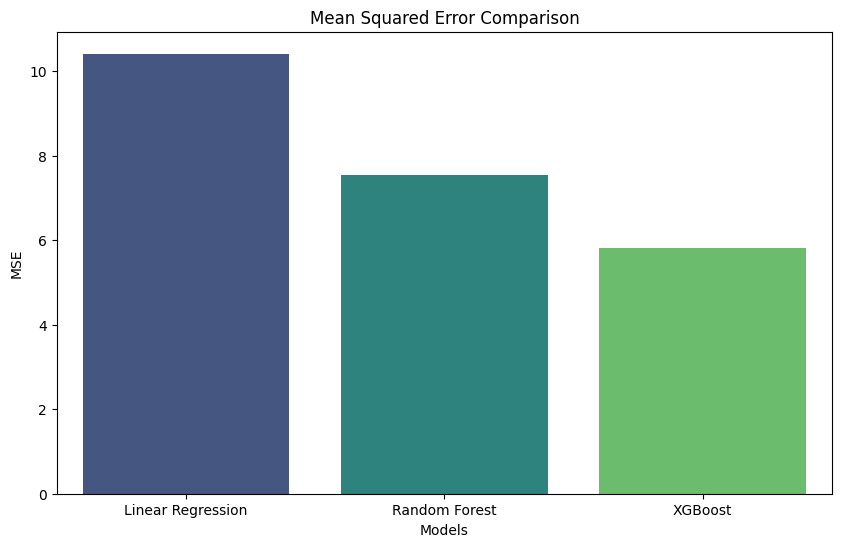

In [ ]:
# ÏãúÍ∞ÅÌôî - R2 ÎπÑÍµê
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df["R2"], palette="viridis")
plt.title("R2 Score Comparison")
plt.ylabel("R2 Score")
plt.xlabel("Models")
plt.show()

# ÏãúÍ∞ÅÌôî - MSE ÎπÑÍµê
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df["MSE"], palette="viridis")
plt.title("Mean Squared Error Comparison")
plt.ylabel("MSE")
plt.xlabel("Models")
plt.show()

# 10) Î™®Îç∏ Ï†ÄÏû• Î∞è Î°úÎî©

In [ ]:
# -------------------------------
# 10. Î™®Îç∏ Ï†ÄÏû• Î∞è Î°úÎî©
# -------------------------------

In [ ]:
# Î™®Îç∏ Ï†ÄÏû•
joblib.dump(best_xgb_model, 'best_xgb_model.pkl')  # Î™®Îç∏ Ï†ÄÏû•

print("Î™®Îç∏Ïù¥ 'best_xgb_model.pkl'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

Î™®Îç∏Ïù¥ 'best_xgb_model.pkl'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


In [ ]:
# Î™®Îç∏ Î°úÎìú
loaded_model = joblib.load('best_xgb_model.pkl')  # Ï†ÄÏû•Îêú Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞

# 5. Î∂àÎü¨Ïò® Î™®Îç∏Î°ú ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = loaded_model.predict(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

# Í≤∞Í≥º Ï∂úÎ†•
print("XGBoost Results")
print(f"MSE: {mse_xgb:.4f}")
print(f"R2: {r2_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"MAPE: {mape_xgb:.2f}%")
print(f"Best Params: {xgb_grid.best_params_}")

XGBoost Results
MSE: 5.8138
R2: 0.8912
MAE: 1.7556
MAPE: 7.24%
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


# Ï∂îÍ∞Ä) XGBoost ÏÑ±Îä• ÎÜíÏù¥Í∏∞

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# ÎûúÎç§ ÏÑúÏπòÏö© ÌååÎùºÎØ∏ÌÑ∞ Î≤îÏúÑ ÏÑ§Ï†ï
xgb_params = {
    "n_estimators": [i for i in range(100, 1100, 100)],  # 100Î∂ÄÌÑ∞ 1100ÍπåÏßÄ 100 Îã®ÏúÑÎ°ú ÌôïÏû•
    "learning_rate": [0.01, 0.1],  # ÌïôÏäµÎ•† ÌôïÏû•
    "max_depth": [2,3,4,5,6],  # ÍπäÏù¥ ÌôïÏû•
    "subsample": [0.7, 0.8, 1.0],  # Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅ ÎπÑÏú® Ï∂îÍ∞Ä
    "colsample_bytree": [0.8, 1.0]  # ÌäπÏÑ± ÏÉòÌîåÎßÅ ÎπÑÏú® Ï∂îÍ∞Ä
}

# XGBoost Î™®Îç∏ Ï¥àÍ∏∞Ìôî
xgb_model = XGBRegressor(random_state=42, eval_metric="rmse", early_stopping_rounds=10) # ÏÑ±Îä•Ïù¥ 10 ÎùºÏö¥Îìú ÎèôÏïà Í∞úÏÑ†ÎêòÏßÄ ÏïäÏúºÎ©¥ Ï§ëÎã®

# RandomizedSearchCV Ï¥àÍ∏∞Ìôî
random_search = RandomizedSearchCV(estimator=xgb_model,
                                   param_distributions=xgb_params,
                                   n_iter=50,
                                   cv=3,
                                   scoring='r2',
                                   random_state=42,
                                   n_jobs=-1
                                   )


random_search.fit(X_train, y_train,
                  eval_set=[(X_test, y_test)],
                  verbose=2
                  )

# ÏµúÏ†Å Î™®Îç∏ Î∞è ÏÑ±Îä• Ï∂úÎ†•
best_xgb_model = random_search.best_estimator_
best_xgb_model.set_params(n_estimators=xgb_grid.best_params_['n_estimators'])  # Best n_estimators ÏÑ§Ï†ï

# ÏòàÏ∏°
y_pred_xgb = best_xgb_model.predict(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

# Í≤∞Í≥º Ï∂úÎ†•
print("XGBoost Results with Early Stopping")
print(f"MSE: {mse_xgb:.4f}")
print(f"R2: {r2_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"MAPE: {mape_xgb:.2f}%")
print(f"Best Params: {xgb_grid.best_params_}")

[0]	validation_0-rmse:6.70708
[2]	validation_0-rmse:5.84271
[4]	validation_0-rmse:5.07437
[6]	validation_0-rmse:4.52744
[8]	validation_0-rmse:4.18403
[10]	validation_0-rmse:3.89502
[12]	validation_0-rmse:3.67965
[14]	validation_0-rmse:3.44502
[16]	validation_0-rmse:3.29783
[18]	validation_0-rmse:3.17176
[20]	validation_0-rmse:3.07225
[22]	validation_0-rmse:2.99358
[24]	validation_0-rmse:2.94417
[26]	validation_0-rmse:2.88437
[28]	validation_0-rmse:2.84786
[30]	validation_0-rmse:2.81199
[32]	validation_0-rmse:2.79040
[34]	validation_0-rmse:2.78096
[36]	validation_0-rmse:2.74683
[38]	validation_0-rmse:2.73835
[40]	validation_0-rmse:2.70955
[42]	validation_0-rmse:2.70169
[44]	validation_0-rmse:2.68211
[46]	validation_0-rmse:2.64569
[48]	validation_0-rmse:2.63166
[50]	validation_0-rmse:2.61844
[52]	validation_0-rmse:2.60213
[54]	validation_0-rmse:2.58771
[56]	validation_0-rmse:2.58072
[58]	validation_0-rmse:2.57385
[60]	validation_0-rmse:2.56950
[62]	validation_0-rmse:2.55533
[64]	validati

In [ ]:
# Ï∂îÍ∞Ä) XGBoost ÏÑ±Îä• ÎÜíÏù¥Í∏∞

# XGBoost ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï: n_estimators Î≤îÏúÑ ÌôïÏû• Î∞è Ï∂îÍ∞Ä ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ï
xgb_params = {
    "n_estimators": [i for i in range(100, 1100, 100)],  # 100Î∂ÄÌÑ∞ 1000ÍπåÏßÄ 100 Îã®ÏúÑÎ°ú ÌôïÏû•
    "learning_rate": [0.01, 0.1],  # ÌïôÏäµÎ•† ÌôïÏû•
    "max_depth": [2,3,4,5,6],  # ÍπäÏù¥ ÌôïÏû•
    "subsample": [0.7, 0.8, 1.0],  # Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅ ÎπÑÏú® Ï∂îÍ∞Ä
    "colsample_bytree": [0.8, 1.0]  # ÌäπÏÑ± ÏÉòÌîåÎßÅ ÎπÑÏú® Ï∂îÍ∞Ä
}

# XGBoost Î™®Îç∏ Ï¥àÍ∏∞Ìôî
xgb_model = XGBRegressor(random_state=42, eval_metric="rmse", early_stopping_rounds=10) # ÏÑ±Îä•Ïù¥ 10 ÎùºÏö¥Îìú ÎèôÏïà Í∞úÏÑ†ÎêòÏßÄ ÏïäÏúºÎ©¥ Ï§ëÎã®

# GridSearchCVÎ°ú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
xgb_grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_params,
    cv=3,
    scoring="r2",
    n_jobs=-1
)

# GridSearchCV ÌïôÏäµ
xgb_grid.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],  # Early stoppingÏùÑ ÏúÑÌïú Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞
    verbose=2
)

# ÏµúÏ†Å Î™®Îç∏ Î∞è ÏÑ±Îä• Ï∂úÎ†•
best_xgb_model = xgb_grid.best_estimator_
best_xgb_model.set_params(n_estimators=xgb_grid.best_params_['n_estimators'])  # Best n_estimators ÏÑ§Ï†ï

# ÏòàÏ∏°
y_pred_xgb = best_xgb_model.predict(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

# Í≤∞Í≥º Ï∂úÎ†•
print("XGBoost Results with Early Stopping")
print(f"MSE: {mse_xgb:.4f}")
print(f"R2: {r2_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"MAPE: {mape_xgb:.2f}%")
print(f"Best Params: {xgb_grid.best_params_}")

[0]	validation_0-rmse:6.70708
[2]	validation_0-rmse:5.84271
[4]	validation_0-rmse:5.07437
[6]	validation_0-rmse:4.52744
[8]	validation_0-rmse:4.18403
[10]	validation_0-rmse:3.89502
[12]	validation_0-rmse:3.67965
[14]	validation_0-rmse:3.44502
[16]	validation_0-rmse:3.29783
[18]	validation_0-rmse:3.17176
[20]	validation_0-rmse:3.07225
[22]	validation_0-rmse:2.99358
[24]	validation_0-rmse:2.94417
[26]	validation_0-rmse:2.88437
[28]	validation_0-rmse:2.84786
[30]	validation_0-rmse:2.81199
[32]	validation_0-rmse:2.79040
[34]	validation_0-rmse:2.78096
[36]	validation_0-rmse:2.74683
[38]	validation_0-rmse:2.73835
[40]	validation_0-rmse:2.70955
[42]	validation_0-rmse:2.70169
[44]	validation_0-rmse:2.68211
[46]	validation_0-rmse:2.64569
[48]	validation_0-rmse:2.63166
[50]	validation_0-rmse:2.61844
[52]	validation_0-rmse:2.60213
[54]	validation_0-rmse:2.58771
[56]	validation_0-rmse:2.58072
[58]	validation_0-rmse:2.57385
[60]	validation_0-rmse:2.56950
[62]	validation_0-rmse:2.55533
[64]	validati